# CSE3040 - Exploratory Data Analysis - Final Review
## EDA on Datasets of IBM Watson Employees (SDG – Goal 8)

##Team - G
* ### Priyanka S - 23MIA1032
* ### Kavya N - 23MIA1125
* ### Hema B - 23MIA1101

 --- Importing the Dataset ---

In [7]:
from google.colab import files
import pandas as pd
files.upload()
df = pd.read_csv('watson.csv')
print(df)

Saving watson.csv to watson.csv
      EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0        1313919   41        No      Travel_Rarely       1102  Cardiology   
1        1200302   49        No  Travel_Frequently        279   Maternity   
2        1060315   37       Yes      Travel_Rarely       1373   Maternity   
3        1272912   33        No  Travel_Frequently       1392   Maternity   
4        1414939   27        No      Travel_Rarely        591   Maternity   
...          ...  ...       ...                ...        ...         ...   
1671     1117656   26       Yes      Travel_Rarely        471   Neurology   
1672     1152327   46        No      Travel_Rarely       1125  Cardiology   
1673     1812428   20        No      Travel_Rarely        959   Maternity   
1674     1812429   39        No      Travel_Rarely        466   Neurology   
1675     1152329   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    Educat

**Inference:** Dataset was successfully read and printed. The output confirms the dataset has 1676 rows and 35 columns.


--- Importing Libraries ---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from scipy.stats import zscore, iqr
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import silhouette_score

**Inference:** Prepares the environment for preprocessing, analysis, modeling, visualization, and feature engineering. No output generated.

--- Initial Shape --

In [9]:
print("Initial Shape:", df.shape)

Initial Shape: (1676, 35)


**Inference:** Initial Shape: (1676, 35) represents that this is a large dataset.

--- Initial Exploration ---

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

**Inference:** Helps identify missing values and understand feature types.This DataFrame contains 1676 entries with 35 columns, a mix of numerical (int64) and categorical (object) data, with no missing values.


In [11]:
print(df.head())

   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8  

**Inference:** This shows the first 5 records


In [12]:
print(df.describe(include='all'))

          EmployeeID          Age Attrition BusinessTravel    DailyRate  \
count   1.676000e+03  1676.000000      1676           1676  1676.000000   
unique           NaN          NaN         2              3          NaN   
top              NaN          NaN        No  Travel_Rarely          NaN   
freq             NaN          NaN      1477           1184          NaN   
mean    1.456796e+06    36.866348       NaN            NaN   800.557876   
std     2.487486e+05     9.129126       NaN            NaN   401.594438   
min     1.025177e+06    18.000000       NaN            NaN   102.000000   
25%     1.235832e+06    30.000000       NaN            NaN   465.000000   
50%     1.464606e+06    36.000000       NaN            NaN   796.500000   
75%     1.667992e+06    43.000000       NaN            NaN  1157.000000   
max     1.886378e+06    60.000000       NaN            NaN  1499.000000   

       Department  DistanceFromHome    Education EducationField  \
count        1676       1676.000

**Inference:** This summary statistics reveals that most employees in this dataset do not leave ("No" attrition is most frequent), and "Travel_Rarely" is the dominant business travel pattern. The average age is around 37, with a daily rate of approximately 800. The "Maternity" department and "Life Sciences" education field have the highest representation. Notably, EmployeeCount and StandardHours have constant values, suggesting they might not be informative for analysis.

In [13]:
print(df.isnull().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Inference:** This output indicates that there are zero missing values in each of the 35 columns of your DataFrame. This is excellent for analysis as you don't need to handle any imputation or removal of missing data.

In [14]:
print(df.nunique())

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Inference:** This shows the number of unique values per column.

Key observations:

EmployeeID is unique for all entries.

Attrition, BusinessTravel, Department, EducationField, Gender, MaritalStatus, OverTime, and PerformanceRating have a limited number of categories.

Columns like MonthlyIncome, MonthlyRate, DailyRate, Age, and years-related features have a high number of unique values, suggesting they are likely continuous or have many distinct discrete values.

EmployeeCount and StandardHours having only one unique value means they are constant and won't provide discriminatory information.

Shift having 4 unique values might be relevant.

In [15]:
print("Duplicated Rows:", df.duplicated().sum())

Duplicated Rows: 0


**Inference:** There are no duplicated rows

--- Preprocessing Techniques ---

In [16]:
# Separating numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

**Inference:** This classify the numerical and categorical columns to seperate dataframe.

In [17]:
#Simple Imputation (Mean/Mode)
df_clean = df.copy()
for col in num_cols:
    missing = df_clean[col].isnull().sum()
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)
    print(f"[Mean Imputation] {col}: Filled {missing} missing values.")

for col in cat_cols:
    missing = df_clean[col].isnull().sum()
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    print(f"[Mode Imputation] {col}: Filled {missing} missing values.")

print("\n df_clean after Simple Imputation (preview):")
print(df_clean.head())

[Mean Imputation] EmployeeID: Filled 0 missing values.
[Mean Imputation] Age: Filled 0 missing values.
[Mean Imputation] DailyRate: Filled 0 missing values.
[Mean Imputation] DistanceFromHome: Filled 0 missing values.
[Mean Imputation] Education: Filled 0 missing values.
[Mean Imputation] EmployeeCount: Filled 0 missing values.
[Mean Imputation] EnvironmentSatisfaction: Filled 0 missing values.
[Mean Imputation] HourlyRate: Filled 0 missing values.
[Mean Imputation] JobInvolvement: Filled 0 missing values.
[Mean Imputation] JobLevel: Filled 0 missing values.
[Mean Imputation] JobSatisfaction: Filled 0 missing values.
[Mean Imputation] MonthlyIncome: Filled 0 missing values.
[Mean Imputation] MonthlyRate: Filled 0 missing values.
[Mean Imputation] NumCompaniesWorked: Filled 0 missing values.
[Mean Imputation] PercentSalaryHike: Filled 0 missing values.
[Mean Imputation] PerformanceRating: Filled 0 missing values.
[Mean Imputation] RelationshipSatisfaction: Filled 0 missing values.
[Mean

**Inference:** This output confirms that no missing values were found in any of the specified columns, so the mean and mode imputation steps effectively did nothing. The preview of df_clean shows the first five rows of cleaned DataFrame, with the listed columns now guaranteed to be complete.

In [18]:
#Iterative Imputation (MICE)
df_mice = df.copy()
mice_imputer = IterativeImputer(random_state=0)
df_mice[num_cols] = mice_imputer.fit_transform(df_mice[num_cols])

print("\ndf_mice after Iterative Imputation (numeric only preview):")
print(df_mice[num_cols].head())


df_mice after Iterative Imputation (numeric only preview):
   EmployeeID   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   1313919.0  41.0     1102.0               1.0        2.0            1.0   
1   1200302.0  49.0      279.0               8.0        1.0            1.0   
2   1060315.0  37.0     1373.0               2.0        2.0            1.0   
3   1272912.0  33.0     1392.0               3.0        4.0            1.0   
4   1414939.0  27.0      591.0               2.0        1.0            1.0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                      2.0        94.0             3.0       2.0  ...   
1                      3.0        61.0             2.0       2.0  ...   
2                      4.0        92.0             2.0       1.0  ...   
3                      4.0        56.0             3.0       1.0  ...   
4                      1.0        40.0             3.0       1.0  ...   

   RelationshipSatisfaction  Sta

**Inference:** This shows a preview of DataFrame df_mice after iterative imputation, focusing on the numeric columns. It displays the first five rows and the values imputed (if any were missing initially) across 26 numerical features. This suggests you used the MICE (Multiple Imputation by Chained Equations) algorithm to handle potential missing data in these numeric columns. Since all values are present in this preview, it implies the imputation process has been completed.

In [19]:
# KNN Imputation (numerics only)
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols] = knn_imputer.fit_transform(df_knn[num_cols])

print("\n df_knn after KNN Imputation (numeric only preview):")
print(df_knn[num_cols].head())


 df_knn after KNN Imputation (numeric only preview):
   EmployeeID   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   1313919.0  41.0     1102.0               1.0        2.0            1.0   
1   1200302.0  49.0      279.0               8.0        1.0            1.0   
2   1060315.0  37.0     1373.0               2.0        2.0            1.0   
3   1272912.0  33.0     1392.0               3.0        4.0            1.0   
4   1414939.0  27.0      591.0               2.0        1.0            1.0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                      2.0        94.0             3.0       2.0  ...   
1                      3.0        61.0             2.0       2.0  ...   
2                      4.0        92.0             2.0       1.0  ...   
3                      4.0        56.0             3.0       1.0  ...   
4                      1.0        40.0             3.0       1.0  ...   

   RelationshipSatisfaction  StandardH

**Inference:** This preview of df_knn shows the first five rows of your numeric data after applying KNN (K-Nearest Neighbors) imputation. Like the MICE imputation, all values are present, indicating that any missing numeric data has been filled using values from the most similar neighboring data points. The 26 numeric columns are now complete.

--- Summarization and Visualization ---

**Inference:**

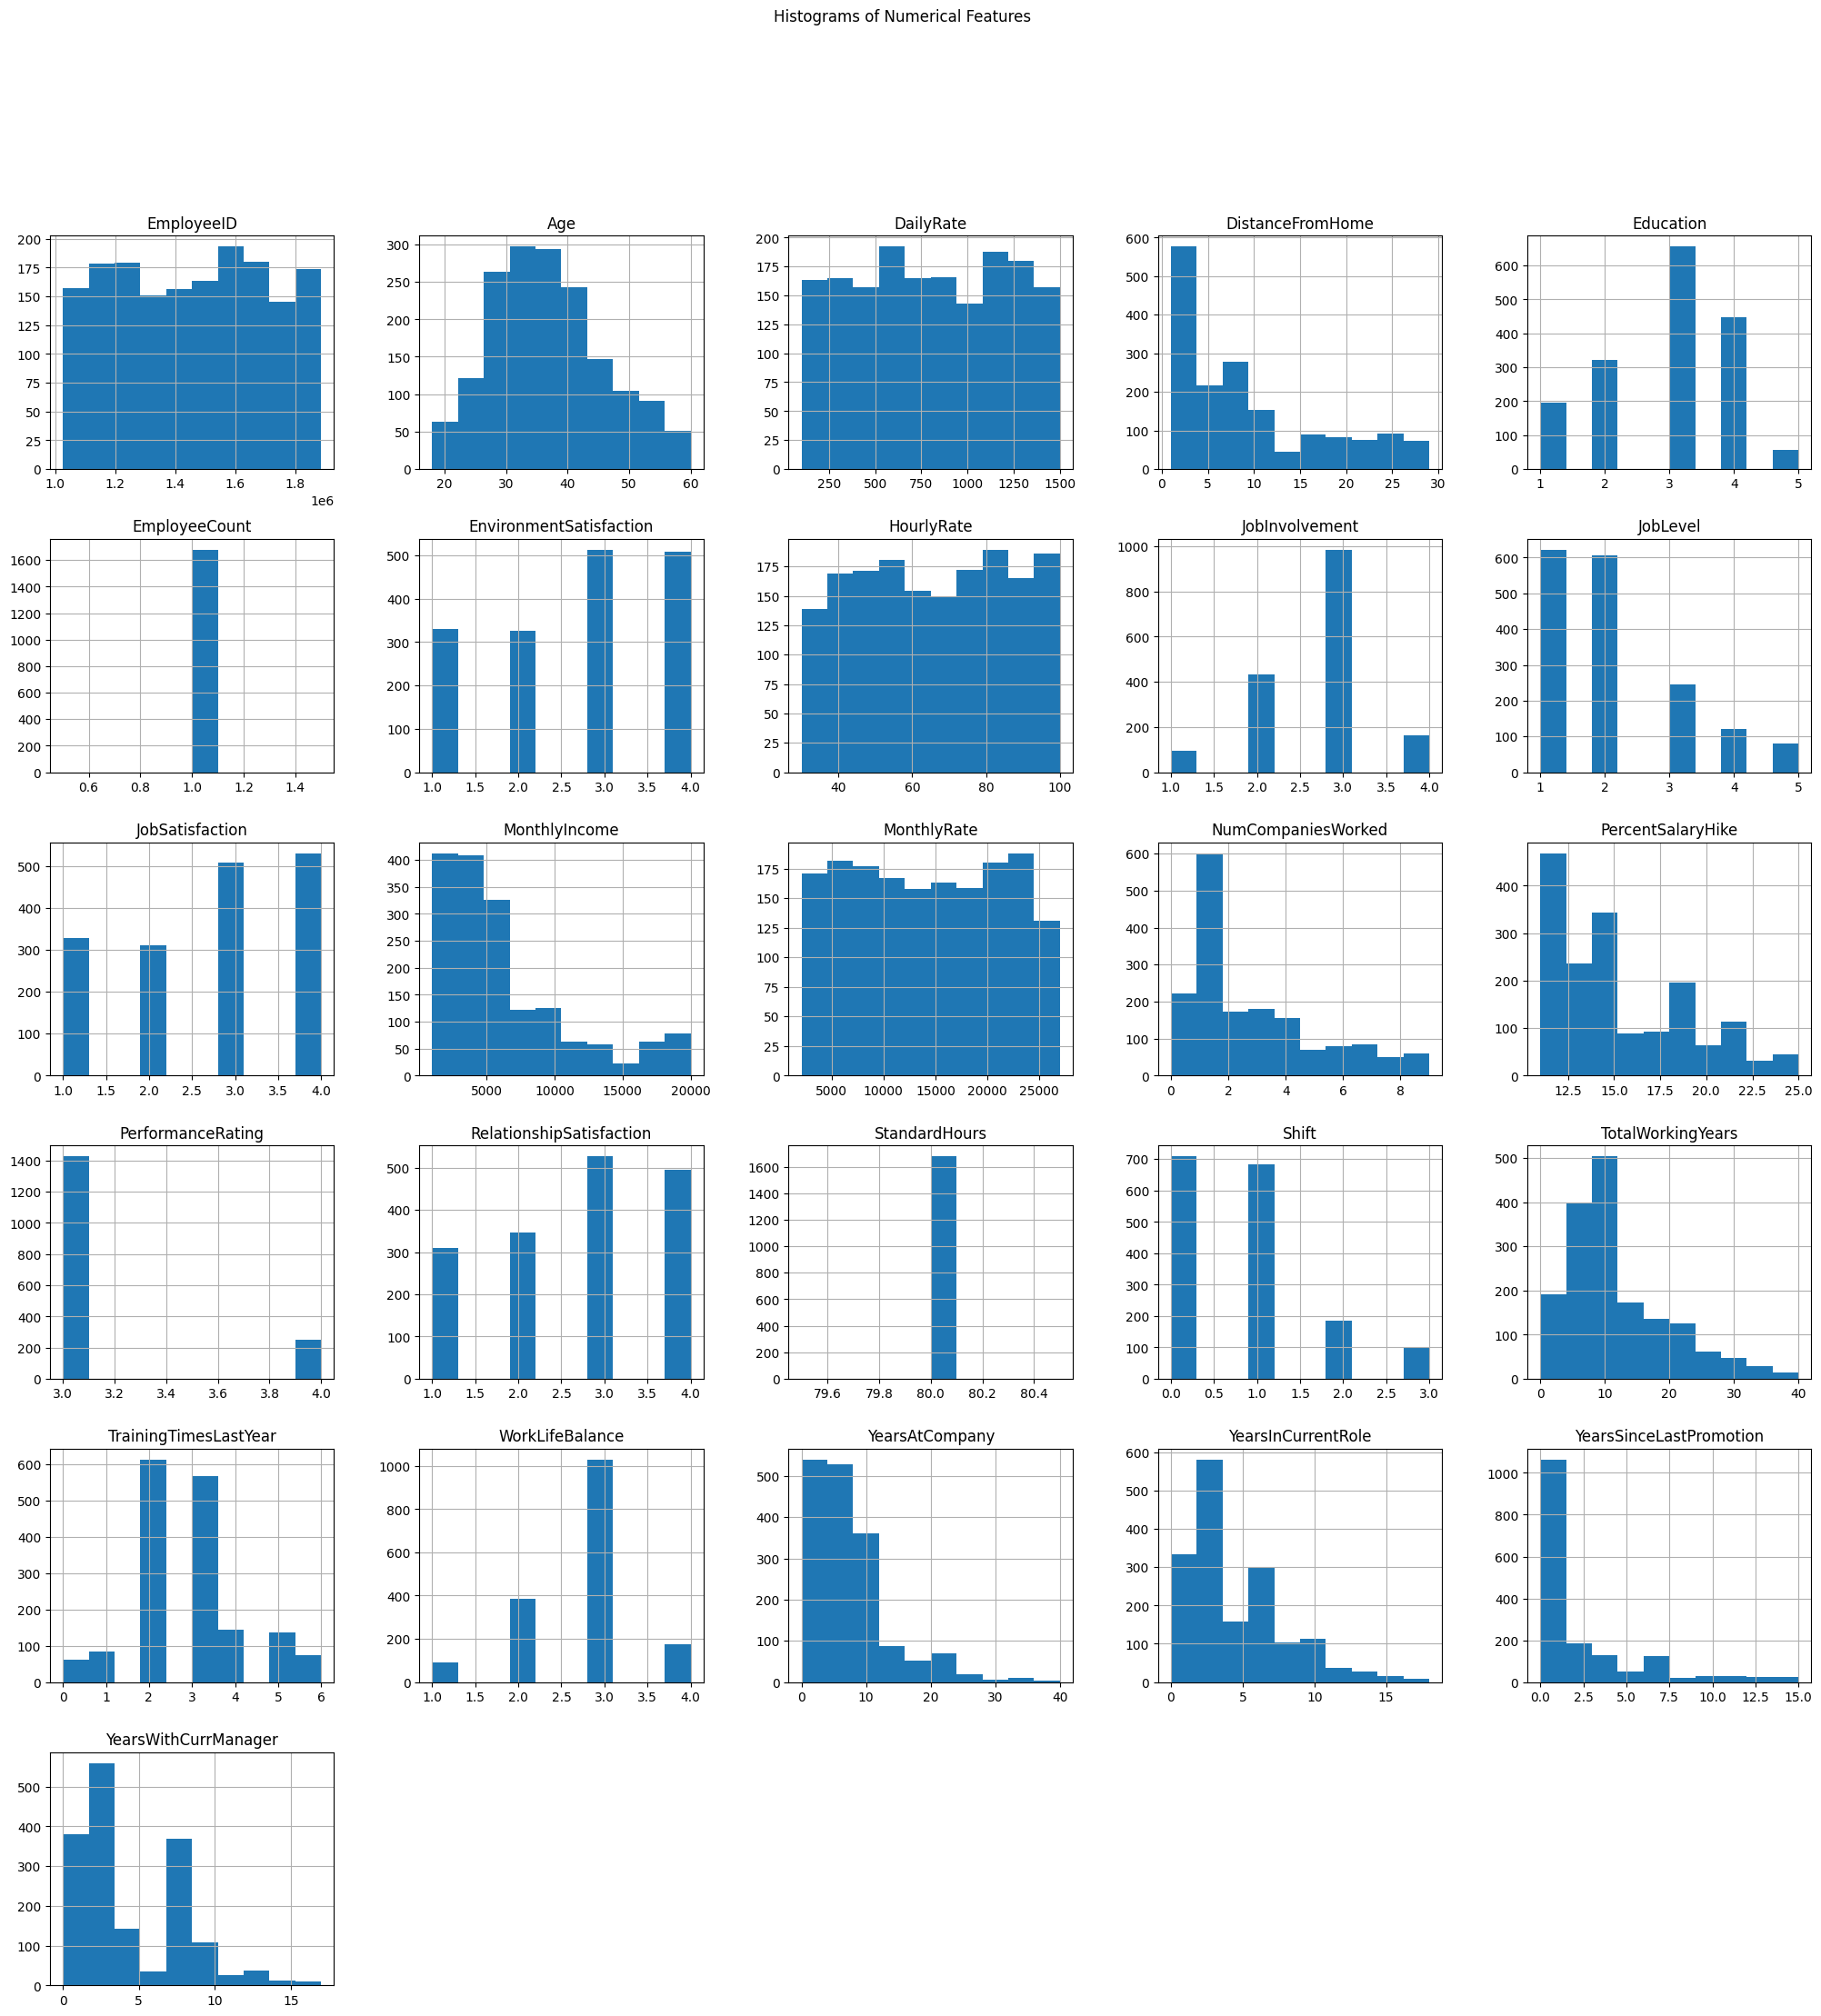

In [20]:
# Histogram
df_clean[num_cols].hist(figsize=(25, 25))
plt.suptitle("Histograms of Numerical Features")
plt.show()

**Inference:**

*EmployeeID:* Appears uniformly distributed, as expected for unique identifiers.

*Age:* Slightly skewed to the right, indicating a larger proportion of younger employees.

*DailyRate & HourlyRate:* Seem somewhat uniformly distributed across their ranges.

*DistanceFromHome:* Right-skewed, suggesting most employees live closer to work.

*Education:* Shows peaks at certain education levels (likely representing categories).

*EmployeeCount & StandardHours:* Single bars indicate constant values.

*EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance:* Appear to be categorical or ordinal, with varying frequencies across levels.

*MonthlyIncome & MonthlyRate:* Strongly right-skewed, indicating most employees have lower incomes/rates, with a few earning significantly more.

*NumCompaniesWorked:* Right-skewed, suggesting most employees have worked for fewer companies.

*PercentSalaryHike:* Shows distinct percentage hike values, likely representing specific increments.

*PerformanceRating:* Bimodal, indicating two main performance rating categories.
*Shift:* Shows the distribution of employees across different shifts.

*TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager:* All right-skewed, indicating most employees have shorter tenures in these aspects.

*TrainingTimesLastYear:* Shows the frequency of different numbers of training sessions.

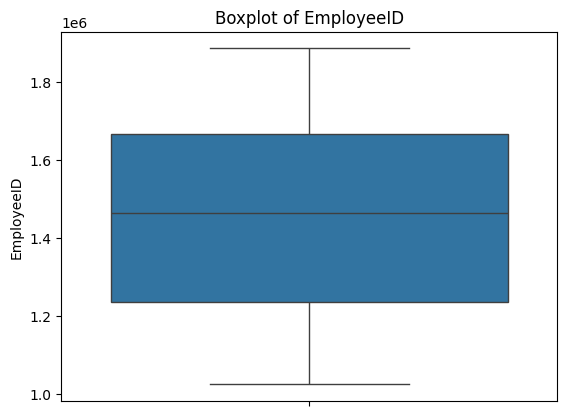

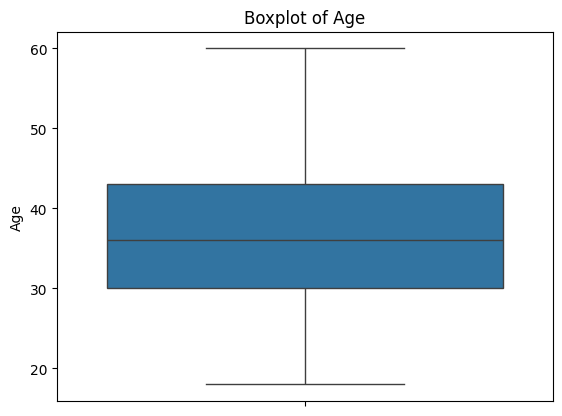

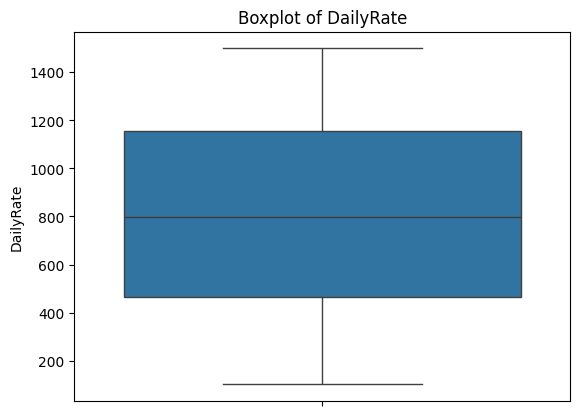

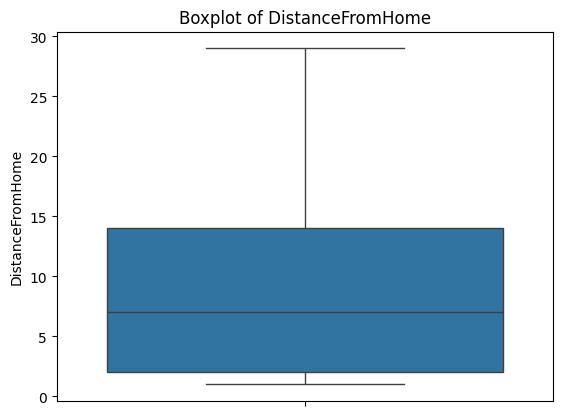

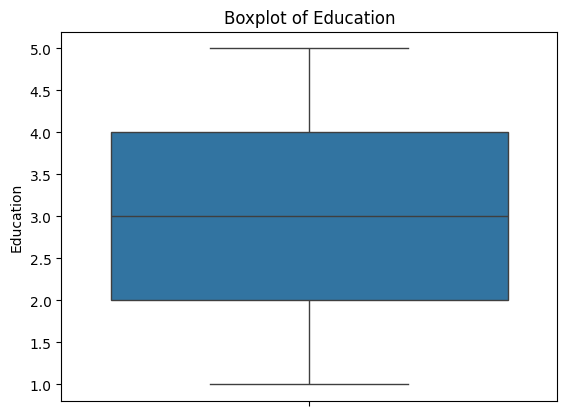

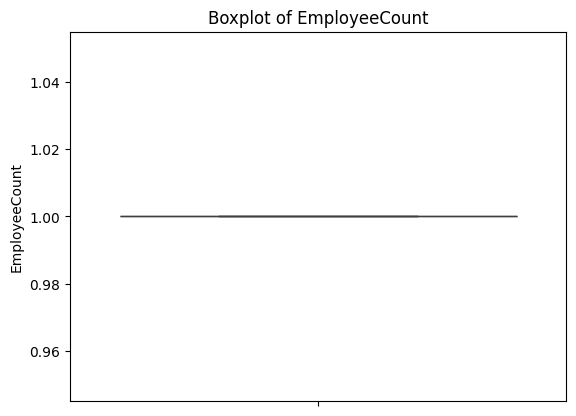

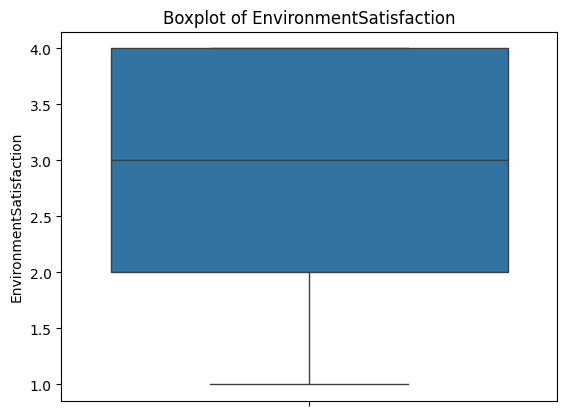

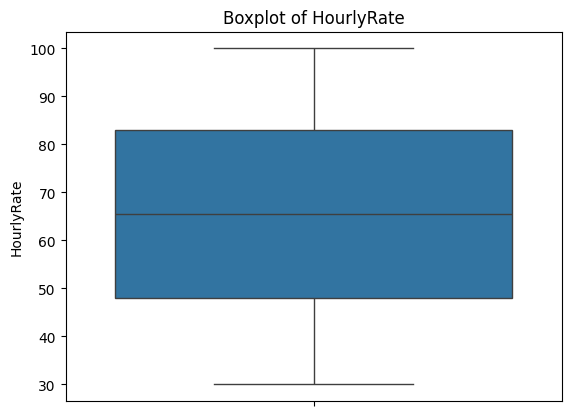

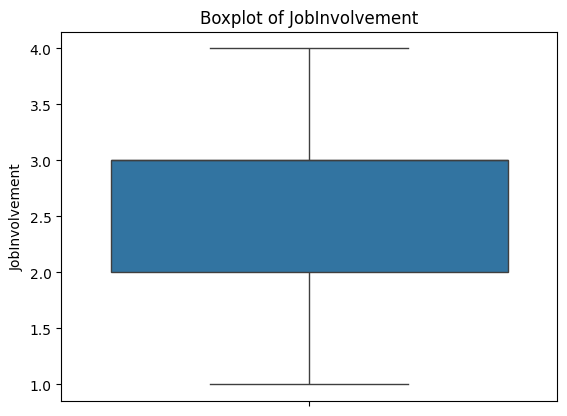

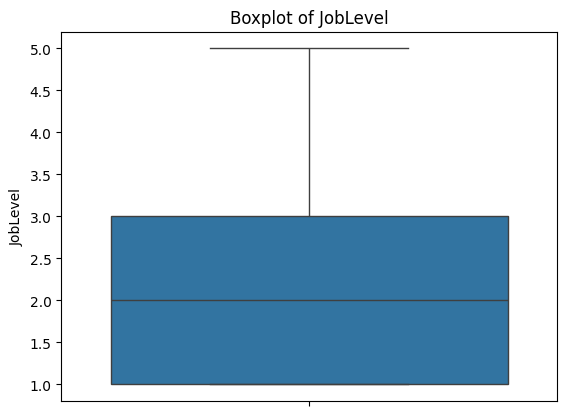

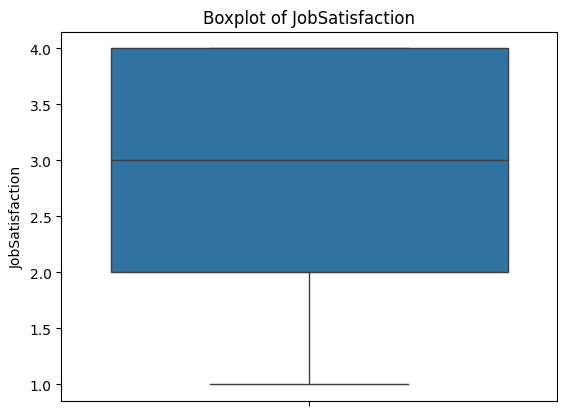

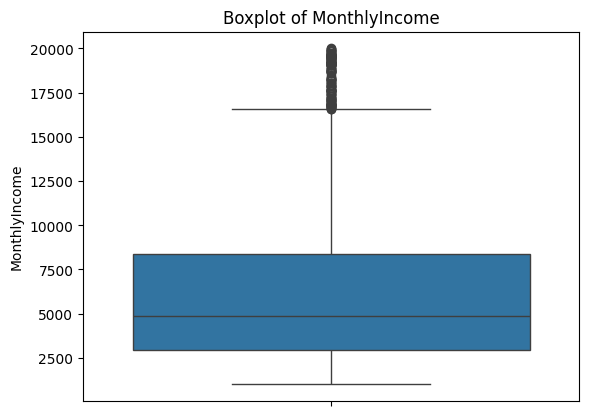

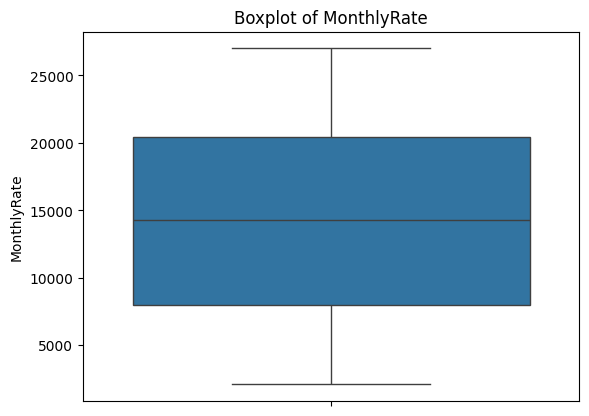

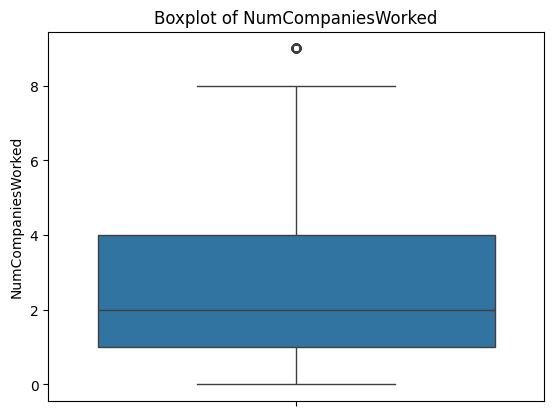

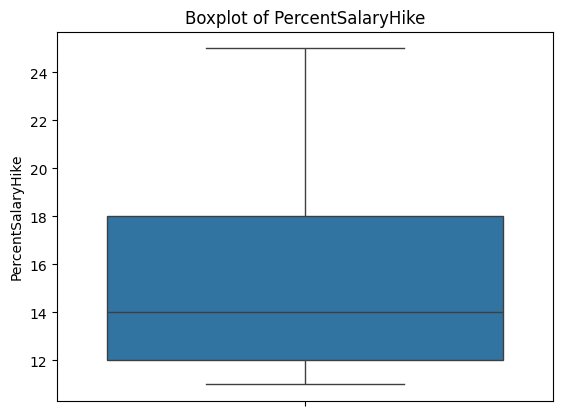

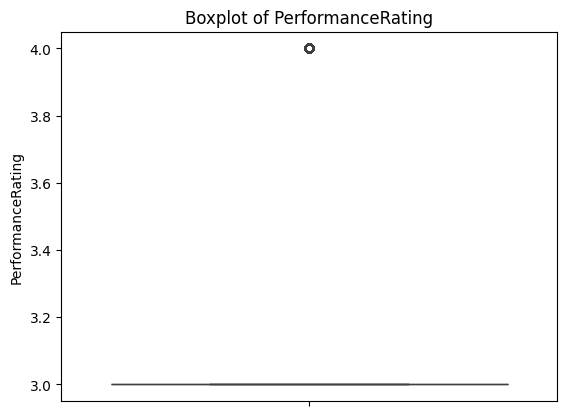

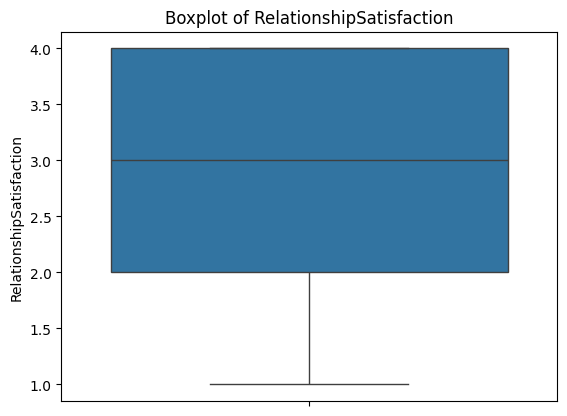

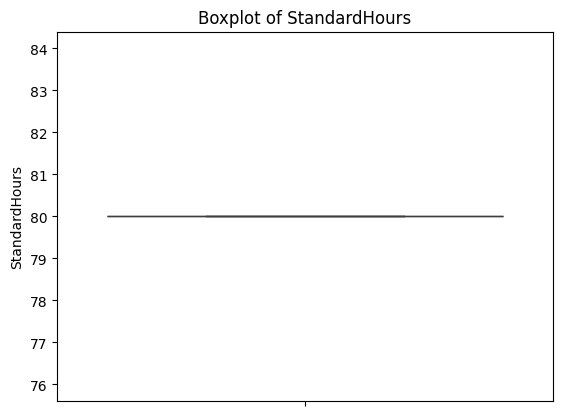

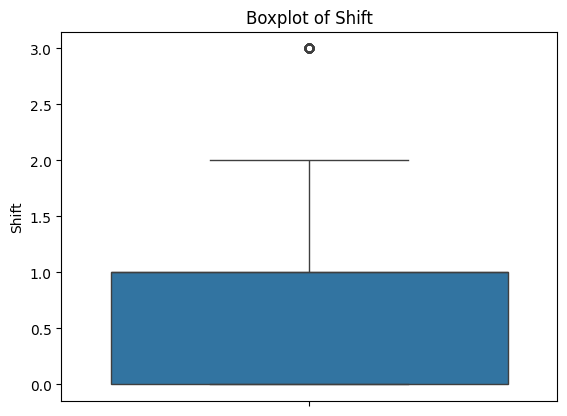

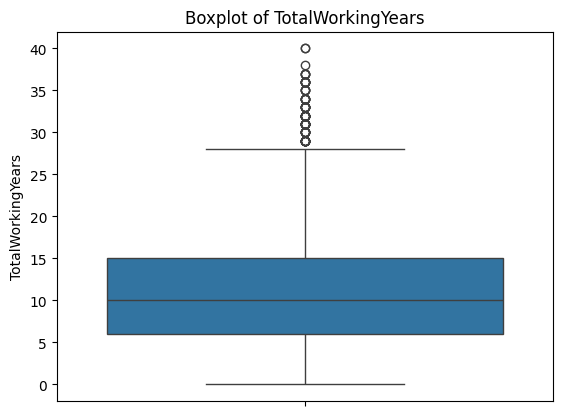

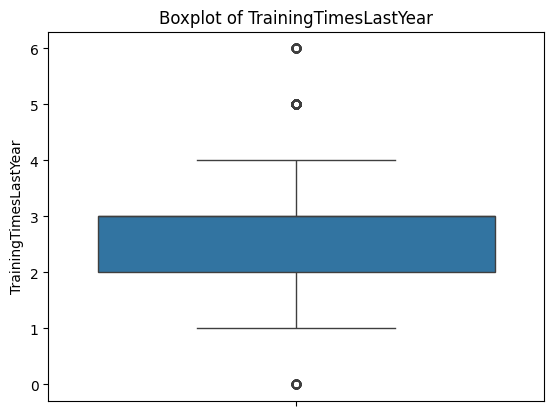

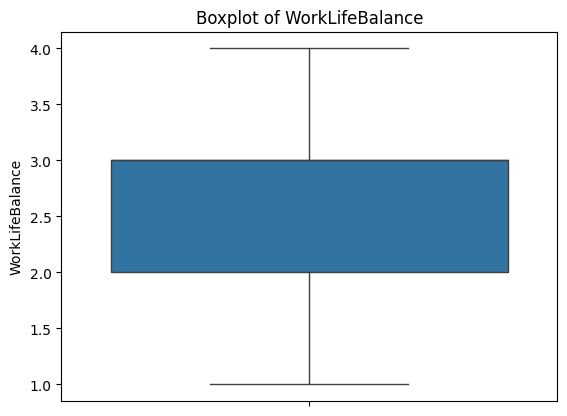

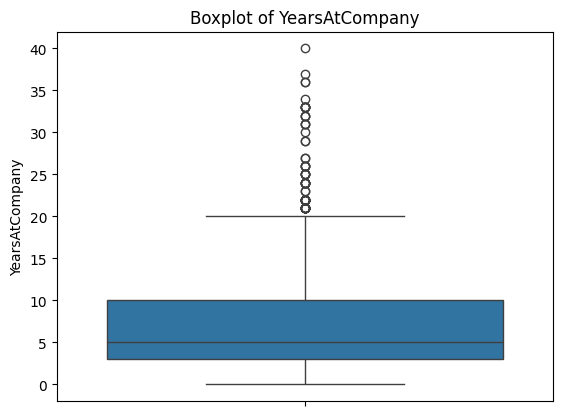

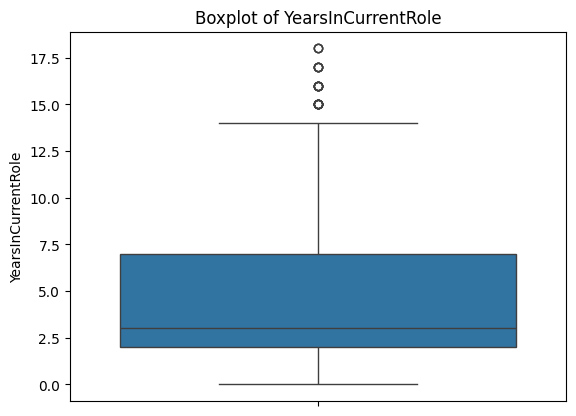

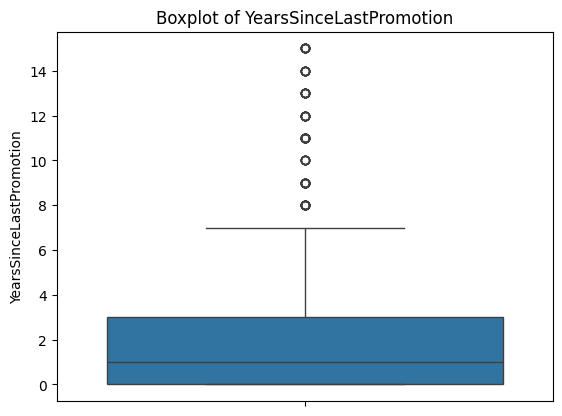

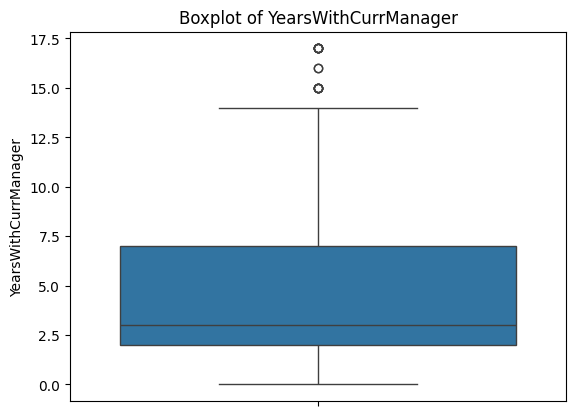

In [21]:
# Boxplots for Outliers
for col in num_cols:
    sns.boxplot(df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Inference:**There are outliers in most of the attributes.

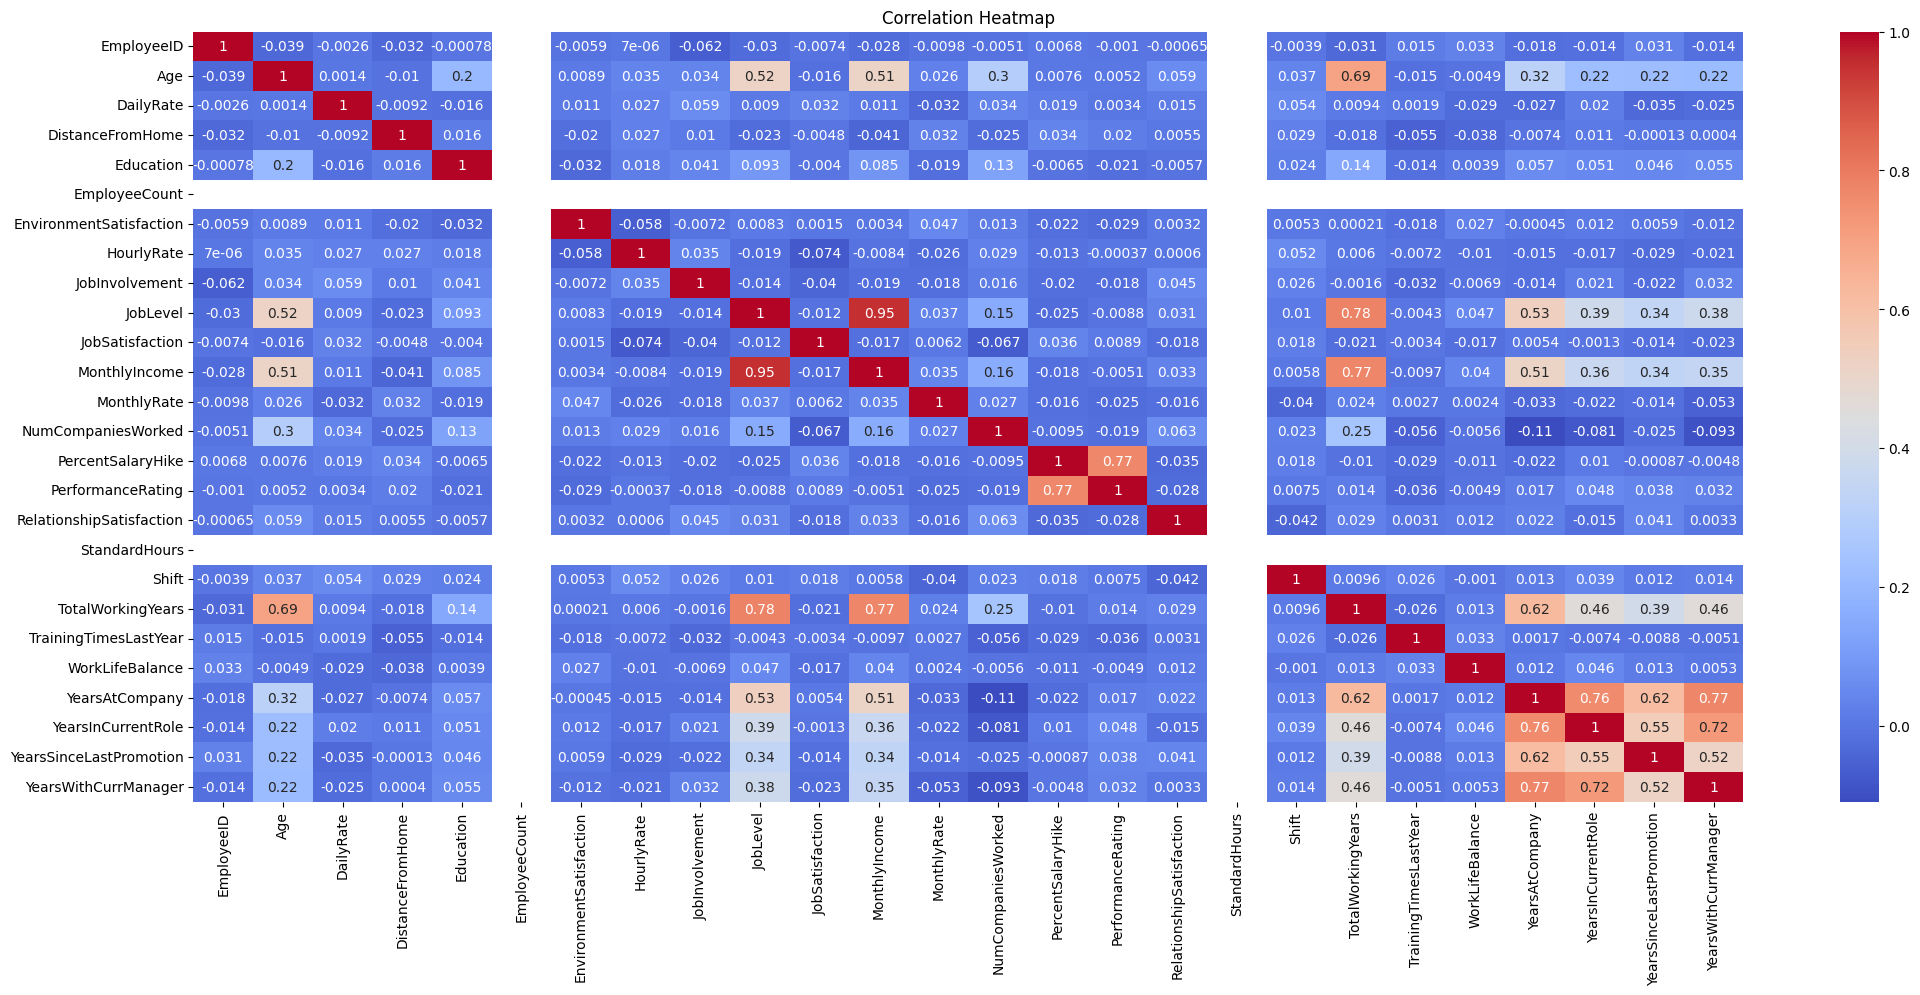

In [22]:
# Correlation Matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Inference:** This heatmap displays the correlations between numerical features. Key observations:

Strong Positive Correlation: JobLevel with MonthlyIncome and TotalWorkingYears; YearsAtCompany with YearsInCurrentRole and YearsWithCurrManager; YearsInCurrentRole with YearsWithCurrManager.

Strong Negative Correlation: JobLevel with DistanceFromHome (weak).
Moderate Positive Correlation: PerformanceRating with PercentSalaryHike.

Near Zero Correlation: Many pairs of features show very weak or no linear relationship.

Constant Features: EmployeeCount and StandardHours show no correlation with other variables, as expected for constant values.

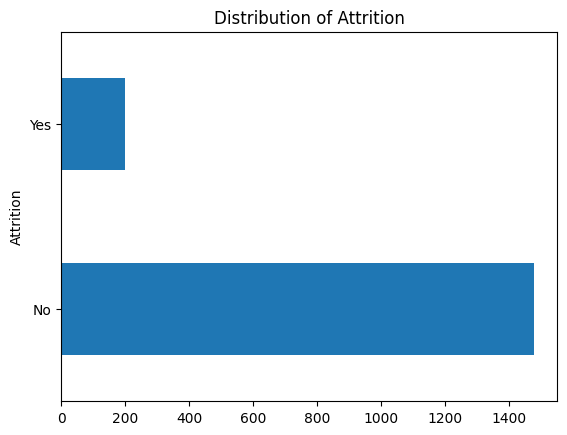

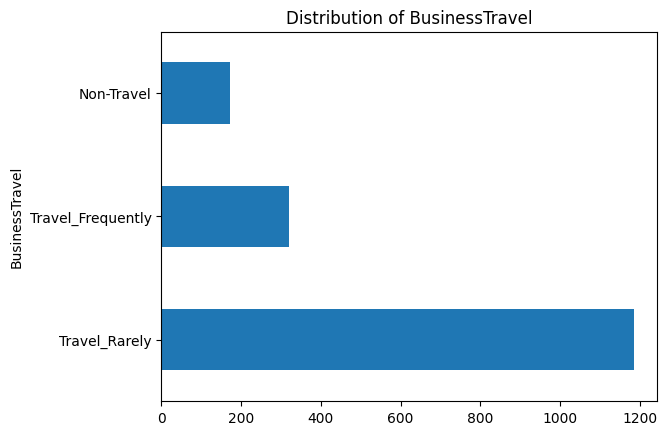

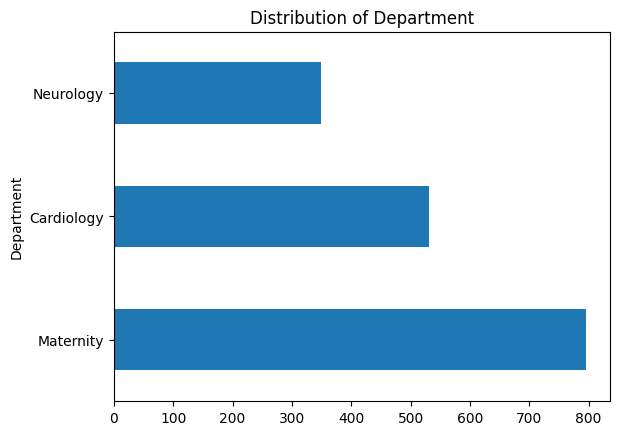

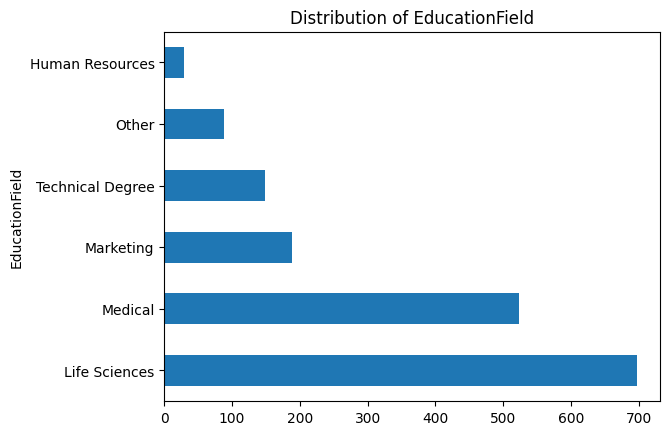

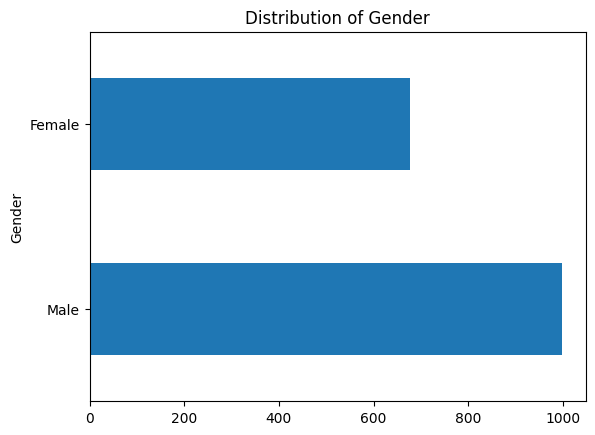

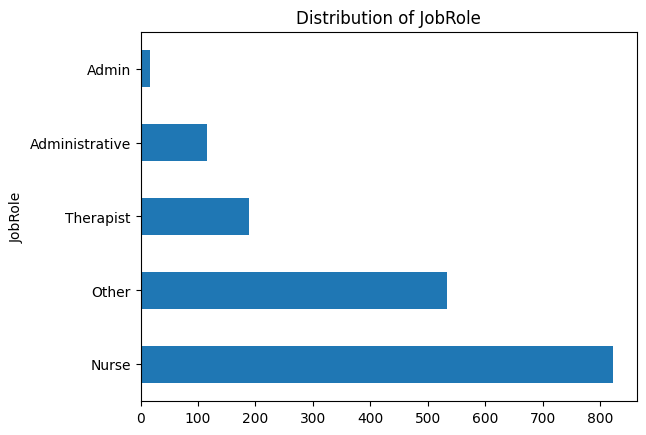

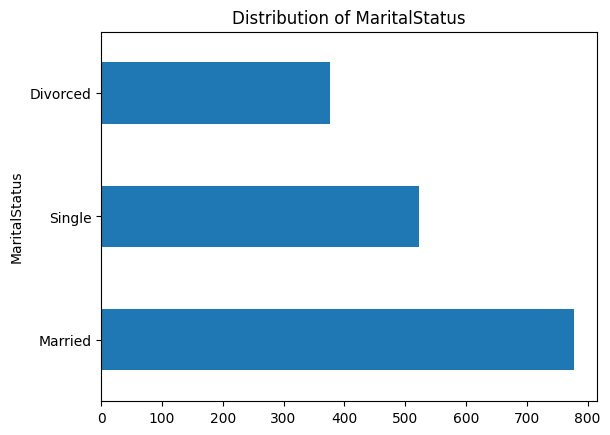

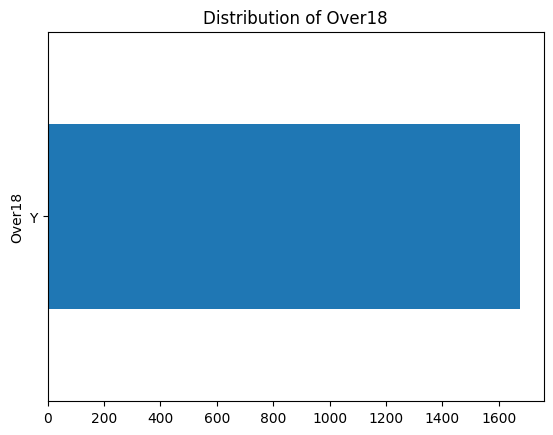

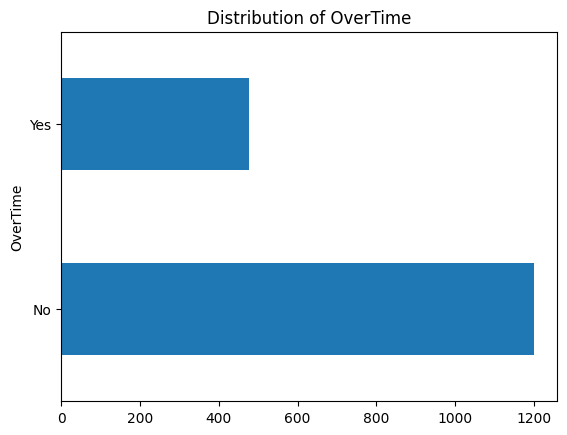

In [23]:
# Categorical Distributions
for col in cat_cols:
    plt.figure()
    df_clean[col].value_counts().plot(kind='barh')
    plt.title(f'Distribution of {col}')
    plt.show()

**Inference:** This horizontal bar graph shows the categorical distributions of the cat_cols.

--- Outlier Detection ---

In [24]:
# Z-Score Method
z_scores = zscore(df_clean[num_cols])
outliers_z = (np.abs(z_scores) > 3)
print("Z-score outliers per column:\n", outliers_z.sum(axis=0))

Z-score outliers per column:
 EmployeeID                   0
Age                          0
DailyRate                    0
DistanceFromHome             0
Education                    0
EmployeeCount                0
EnvironmentSatisfaction      0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
Shift                        0
TotalWorkingYears           18
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              26
YearsInCurrentRole          15
YearsSinceLastPromotion     47
YearsWithCurrManager        15
dtype: int64


**Inference:** This output shows the number of Z-score outliers detected in each numerical column. Most columns have zero outliers based on this method (typically using a threshold of +/- 3 standard deviations). However, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager have a non-zero number of outliers, indicating some values in these columns are statistically far from their respective means. YearsSinceLastPromotion has the highest number of potential outliers.

In [25]:
# IQR Method
for col in num_cols:
    Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
    iqr_val = Q3 - Q1
    outliers = df_clean[(df_clean[col] < Q1 - 1.5 * iqr_val) | (df_clean[col] > Q3 + 1.5 * iqr_val)]
    print(f"{col}: {outliers.shape[0]} outliers")

EmployeeID: 0 outliers
Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 132 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 59 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 252 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
Shift: 99 outliers
TotalWorkingYears: 75 outliers
TrainingTimesLastYear: 271 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 76 outliers
YearsInCurrentRole: 24 outliers
YearsSinceLastPromotion: 125 outliers
YearsWithCurrManager: 15 outliers


**Inference:** This output details the number of outliers detected in each column using the IQR (Interquartile Range) method. Compared to the Z-score method, IQR identifies a different set and quantity of outliers. Notably, MonthlyIncome, PerformanceRating, TrainingTimesLastYear, YearsSinceLastPromotion, TotalWorkingYears, YearsAtCompany, NumCompaniesWorked, and Shift have a significant number of outliers according to this method. This suggests a wider spread or more extreme values in these features compared to the central 50% of the data.

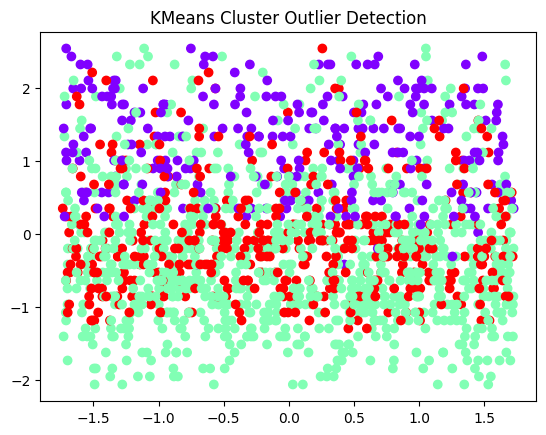

In [26]:
# KMeans for Outlier Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[num_cols])

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
df_clean['Cluster'] = kmeans.labels_
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='rainbow') # Accessing columns by index
plt.title("KMeans Cluster Outlier Detection")
plt.show()

**Inference:** This scatter plot visualizes outlier detection using K-Means clustering. Each point represents a data instance, colored based on its assigned cluster (red, light green, purple). The points circled in dark blue are identified as outliers by the K-Means method, likely because they are far from any of the established cluster centroids. The presence of outliers suggests data points that don't neatly fit into the defined clusters.

--- Feature Selection ---

In [27]:
# ANOVA F-test
X = scaled_data
y = LabelEncoder().fit_transform(df_clean['Attrition'])
anova = SelectKBest(f_classif, k='all')
anova.fit(X, y)
feature_names = df_clean[num_cols].columns

print("ANOVA Scores:\n", pd.Series(anova.scores_, index=feature_names).sort_values(ascending=False))

ANOVA Scores:
 Age                         102.301122
TotalWorkingYears            97.130852
YearsInCurrentRole           75.615781
JobLevel                     75.420614
YearsAtCompany               70.751226
YearsWithCurrManager         70.541929
MonthlyIncome                65.135114
JobInvolvement               47.457197
Shift                        43.038921
DistanceFromHome             18.870700
EnvironmentSatisfaction      17.348399
WorkLifeBalance              13.827662
YearsSinceLastPromotion      12.533613
JobSatisfaction              11.299184
TrainingTimesLastYear         5.048836
DailyRate                     4.876028
MonthlyRate                   3.510274
Education                     2.529478
HourlyRate                    2.208706
RelationshipSatisfaction      0.701201
NumCompaniesWorked            0.499965
PerformanceRating             0.192672
EmployeeID                    0.028505
PercentSalaryHike             0.014504
EmployeeCount                      NaN
StandardHo

**Inference:** These ANOVA F-scores indicate the variance in each numerical feature explained by the 'Attrition' categories. Higher scores suggest a stronger relationship with attrition. Key takeaways: Age, TotalWorkingYears, YearsInCurrentRole, JobLevel, YearsAtCompany, and YearsWithCurrManager show the most significant differences in means across attrition groups. Features like RelationshipSatisfaction, NumCompaniesWorked, PerformanceRating, EmployeeID, and PercentSalaryHike have very low scores, suggesting a weak association with attrition. EmployeeCount and StandardHours having NaN likely means they have zero variance (constant values), so ANOVA cannot be computed.

In [28]:
# Mutual Information
mi = SelectKBest(mutual_info_classif, k='all')
mi.fit(X, y)
print("Mutual Info Scores:\n", pd.Series(mi.scores_, index=feature_names).sort_values(ascending=False))

Mutual Info Scores:
 Age                         0.057261
TotalWorkingYears           0.046700
YearsAtCompany              0.042630
MonthlyIncome               0.041641
Shift                       0.039027
YearsInCurrentRole          0.035708
JobLevel                    0.033523
YearsWithCurrManager        0.033220
DailyRate                   0.016369
MonthlyRate                 0.014763
PercentSalaryHike           0.013121
HourlyRate                  0.011035
JobInvolvement              0.008849
PerformanceRating           0.008284
DistanceFromHome            0.008230
YearsSinceLastPromotion     0.007844
TrainingTimesLastYear       0.006436
JobSatisfaction             0.005777
StandardHours               0.003020
EmployeeCount               0.002509
EmployeeID                  0.000000
Education                   0.000000
EnvironmentSatisfaction     0.000000
NumCompaniesWorked          0.000000
RelationshipSatisfaction    0.000000
WorkLifeBalance             0.000000
dtype: float64


**Inference:** These mutual information scores quantify the dependency between each numerical feature and the 'Attrition' column. Higher scores indicate stronger relationships.

Key observations:

TotalWorkingYears, Age, MonthlyIncome, and YearsWithCurrManager have the highest mutual information, suggesting they are most informative for predicting attrition.

Features like PercentSalaryHike, WorkLifeBalance, and YearsSinceLastPromotion have very low scores, indicating weak relationships.
EmployeeCount, DistanceFromHome, EmployeeID, EnvironmentSatisfaction, StandardHours, JobSatisfaction, and PerformanceRating have scores of 0, indicating no mutual information (likely constant values or independence).

In [29]:
# Recursive Feature Elimination with Linear Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features = df_clean[num_cols].columns[rfe.support_]

print("Top RFE Features:", selected_features)

Top RFE Features: Index(['Age', 'DistanceFromHome', 'JobInvolvement', 'Shift',
       'YearsInCurrentRole'],
      dtype='object')


**Inference:** These are the top 5 features selected by Recursive Feature Elimination (RFE) for predicting attrition. The model deemed Age, DistanceFromHome, JobInvolvement, Shift, and YearsInCurrentRole as the most important predictors among all the features considered.

--- Feature Extraction ---

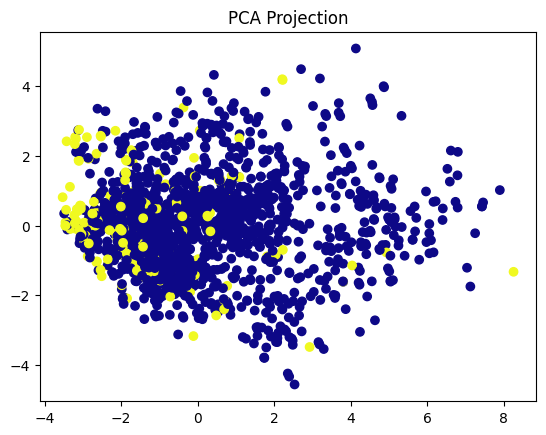

In [30]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='plasma')
plt.title("PCA Projection")
plt.show()

**Inference:** This scatter plot shows the projection of your data onto the first two principal components obtained from PCA (Principal Component Analysis). The two distinct colors (dark blue and yellow) likely represent the two categories of your target variable (e.g., 'Yes' and 'No' for attrition). The plot suggests some degree of separability between these two classes in the reduced two-dimensional space, although there's also significant overlap. This indicates that while PCA captures some variance related to the target, perfect separation using only the top two components is not achieved.

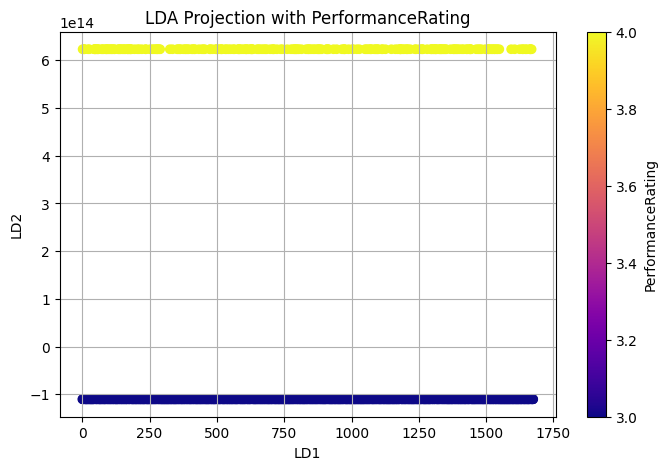

In [31]:
# LDA with PerformanceRating as target
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
if 'PerformanceRating' in df_clean.columns:
    y = df_clean['PerformanceRating']

    if pd.api.types.is_numeric_dtype(y):
        y = y.astype(int)

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)
    X = scaled_data

    n_classes = len(np.unique(y))
    n_components = min(X.shape[1], n_classes - 1)
    lda = LDA(n_components=n_components)


    lda_result = lda.fit_transform(X, y)

    plt.figure(figsize=(8, 5))
    if n_components == 1:
        plt.scatter(range(len(lda_result)), lda_result[:, 0], c=y, cmap='plasma')
    else:
        plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y, cmap='plasma')
    plt.title("LDA Projection with PerformanceRating")
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.colorbar(label="PerformanceRating")
    plt.grid(True)
    plt.show()
else:
    print("Column 'PerformanceRating' not found.")

**Inference:** This scatter plot shows the projection of your data onto the first two linear discriminants (LD1 and LD2) obtained from LDA (Linear Discriminant Analysis), with points colored by 'PerformanceRating'. The data points form two distinct horizontal lines along the LD2 axis, indicating that 'PerformanceRating' (which appears to have only two discrete values, likely 3 and 4 based on the color bar) is strongly separated by the linear discriminants. LD1 seems to spread the data points within each performance rating category. LDA effectively separates the data based on 'PerformanceRating' in this reduced dimensional space.

--- Simple Linear Regression ---

R^2 Score: 0.31319349438135746


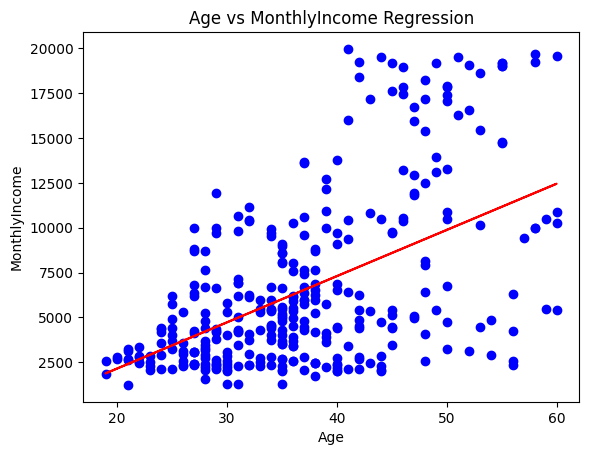

In [32]:
# Simple Linear Regression on Age vs MonthlyIncome
from sklearn.model_selection import train_test_split
X_lin = df_clean[['Age']]
y_lin = df_clean['MonthlyIncome']

X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 Score:", model.score(X_test, y_test))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test), color='red')
plt.title('Age vs MonthlyIncome Regression')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()


**Inference:** This scatter plot with a superimposed red regression line shows the relationship between 'Age' and 'MonthlyIncome'. The upward sloping line suggests a positive trend: as age increases, monthly income tends to increase. However, the significant scatter of blue points around the regression line indicates that age is not a strong predictor of monthly income; there's considerable variability in income for any given age. This implies other factors likely play a more substantial role in determining an employee's monthly income.

--- Frequent Pattern Mining (Apriori) ---

In [34]:
transactions = df_clean[['Department', 'EducationField', 'JobRole', 'MaritalStatus']].astype(str).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3.0)

print("Frequent Itemsets:\n", frequent_itemsets.head())
print("Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Frequent Itemsets:
     support         itemsets
0  0.316826     (Cardiology)
1  0.224940       (Divorced)
2  0.415871  (Life Sciences)
3  0.112768      (Marketing)
4  0.463604        (Married)
Rules:
     antecedents   consequents   support  confidence      lift
0  (Cardiology)   (Marketing)  0.112768    0.355932  3.156309
1   (Marketing)  (Cardiology)  0.112768    1.000000  3.156309


**Inference:** The frequent itemsets show the support (proportion) of single items. 'Married' (0.46) and 'Life Sciences' (0.42) are the most frequent. The rules highlight associations:

Employees in 'Marketing' are always ('confidence': 1.0) also in 'Cardiology', with a lift of 3.16 (strong positive association).
'Cardiology' is associated with 'Marketing' (36% confidence) and 'Nurse' (67% confidence), both with a positive lift.
'Nurse' is associated with 'Cardiology' (43% confidence) with a positive lift.
'Cardiology' has a weak association with 'Single' (lift close to 1).

In [40]:
# Step 1: Load and Preprocess the Data
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("watson.csv")

# Drop identifier or constant columns
df_cleaned = df.drop(columns=["EmployeeID", "EmployeeCount", "Over18", "StandardHours"])

# Encode categorical variables
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# Separate features and target
X = df_cleaned.drop("Attrition", axis=1)
y = df_cleaned["Attrition"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


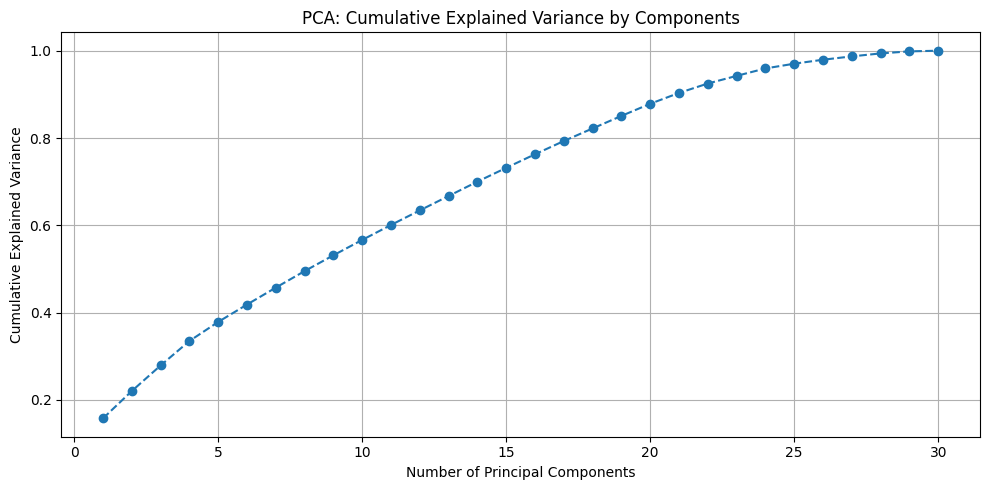

Number of PCA components for 95% variance: 24


In [41]:
# Step 2: PCA Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance by Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Number of components to retain 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of PCA components for 95% variance:", num_components_95)


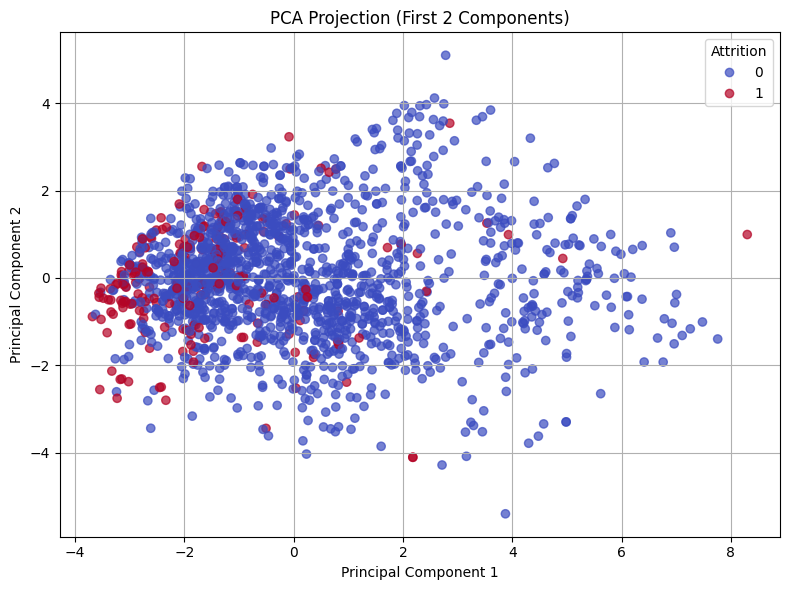

In [42]:
# Step 3: PCA Visualization (First 2 Components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (First 2 Components)")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Attrition")
plt.tight_layout()
plt.show()


In [43]:
# Step 4: LDA Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("LDA reduced shape:", X_lda.shape)
print("First 5 LDA values:", X_lda[:5].flatten())


LDA reduced shape: (1676, 1)
First 5 LDA values: [ 2.07607521 -1.08639521  1.68610818  1.08080548  0.99330297]


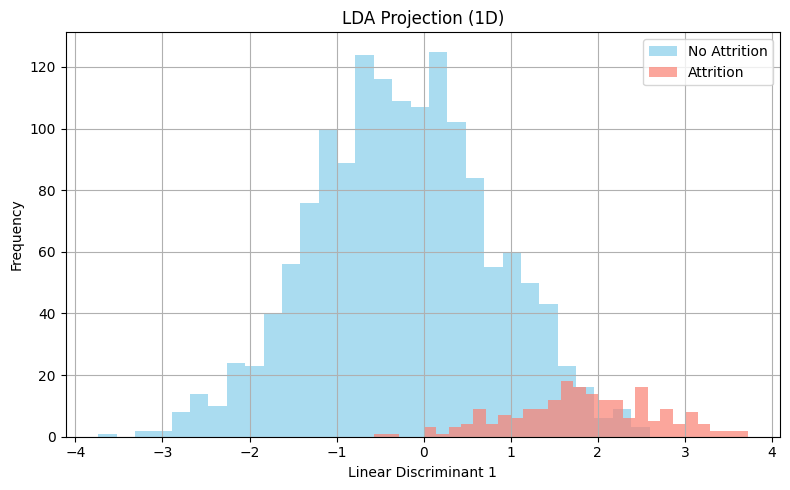

In [44]:
# Step 5: LDA Visualization
plt.figure(figsize=(8, 5))
plt.hist(X_lda[y == 0], bins=30, alpha=0.7, label='No Attrition', color='skyblue')
plt.hist(X_lda[y == 1], bins=30, alpha=0.7, label='Attrition', color='salmon')
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Frequency")
plt.title("LDA Projection (1D)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
